In [1]:
#files
import sys
#from os import listdir
sys.path.append('../data')
sys.path.append('../Librerias')
#from os.path import isfile, join

#own libs
import utils
import caract as dc
import dataset as ds
from models import SimpleRNN, LSTM, MLP
#from lstm_models import LSTM
import utils_2 as ut2
from traindata import trainData
import errores as er



#data and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score

sns.set_style("darkgrid")


import numpy as np
import random
import os, errno
from tqdm import tqdm

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import torch.utils.data as data_utils


np.random.seed(seed=77)
torch.manual_seed(77)

c:\Users\consu\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
fpath = "/Users/consu/OneDrive/Documentos/GitHub/Tesis/data/low/"
#fpath = "/Users/granosftp/Documents/GitHub/Tesis/data/low/"
fname = "file1_080124.mat"
#cutoff = [8/1000, 11/1000]

data = trainData(fpath, fname, 'Amplitude')
train, val, test = data.split_data('Amplitude')


0         0.001705
1         0.001436
2         0.001494
3         0.001446
4         0.001489
            ...   
599995    0.000679
599996    0.000686
599997    0.000843
599998    0.000868
599999    0.001361
Name: Amplitude, Length: 600000, dtype: float64
0         0.001705
1         0.001436
2         0.001494
3         0.001446
4         0.001489
            ...   
599995    0.000679
599996    0.000686
599997    0.000843
599998    0.000868
599999    0.001361
Name: Amplitude, Length: 600000, dtype: float64
0         0.001705
1         0.001436
2         0.001494
3         0.001446
4         0.001489
            ...   
599995    0.000679
599996    0.000686
599997    0.000843
599998    0.000868
599999    0.001361
Name: Amplitude, Length: 600000, dtype: float64
0         0.001705
1         0.001436
2         0.001494
3         0.001446
4         0.001489
            ...   
599995    0.000679
599996    0.000686
599997    0.000843
599998    0.000868
599999    0.001361
Name: Amplitude, Len

In [3]:
train = utils.subsample(train, 2)
test = utils.subsample(test, 2)

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.reshape(-1, 1))
#test = copy.deepcopy(test_scaled)

amplitude = data.data['Amplitude'].values
amplitude = scaler.transform(amplitude.reshape(-1, 1))
defectos = data.defectos_set()

In [4]:
in_size = 1000
out_size = 1
hid_size = 500
num_layers = 2

model = MLP(in_size, hid_size, out_size)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

utils.resume(model, optimizer, 'earlystop_180.pth')

## **50 steps**

In [5]:
steps = 50 
x_test, y_test = ut2.defectos_set(defectos, amplitude, steps*2, horizon = 2000)

x_test = [utils.subsample(elem,2) for elem in x_test]
x_test = np.array(x_test)

y_test = [utils.subsample(elem,2) for elem in y_test]
y_test = np.array(y_test)


x_test = torch.from_numpy(x_test.astype(np.float32)).squeeze()
y_test = torch.from_numpy(y_test.astype(np.float32)).squeeze()

x_test.shape, y_test.shape


(torch.Size([95, 1000]), torch.Size([95, 50]))

In [6]:
test50 = ut2.rollingWindowPrediction(model,x_test,steps)
np.savetxt("test50_MLP_defectos.csv", test50, delimiter=",")

100%|██████████| 95/95 [00:02<00:00, 40.31it/s]


In [7]:
mse, mape, r2, rmse = er.calculate_errors(test50, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.0020990343481593885
Mean Absolute Percentage Error: 2.6378546251125847
R2 Score: -18.591271475417212
Root Mean Squared Error: 0.042680270048809726


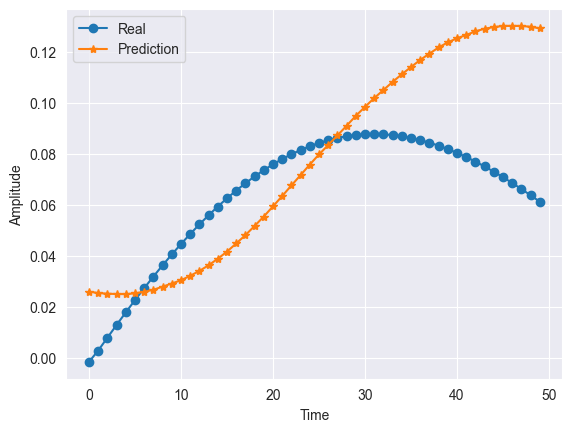

In [8]:
i = 10
plt.plot(y_test[i], 'o-',label='Real')
plt.plot(test50[i], '*-',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


## **100 steps**

In [9]:
steps = 100
x_test, y_test = ut2.defectos_set(defectos, amplitude, steps*2, horizon = 2000)

x_test = [utils.subsample(elem,2) for elem in x_test]
x_test = np.array(x_test)

y_test = [utils.subsample(elem,2) for elem in y_test]
y_test = np.array(y_test)


x_test = torch.from_numpy(x_test.astype(np.float32)).squeeze()
y_test = torch.from_numpy(y_test.astype(np.float32)).squeeze()

x_test.shape, y_test.shape

(torch.Size([95, 1000]), torch.Size([95, 100]))

In [10]:
test100 = ut2.rollingWindowPrediction(model,x_test,steps)
np.savetxt("test100_MLP_defectos.csv", test100, delimiter=",")

100%|██████████| 95/95 [00:04<00:00, 20.19it/s]


In [11]:
mse, mape, r2, rmse = er.calculate_errors(test100, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.00421225316242971
Mean Absolute Percentage Error: 1.7309665835986678
R2 Score: -9.33439861743056
Root Mean Squared Error: 0.060889956548981876


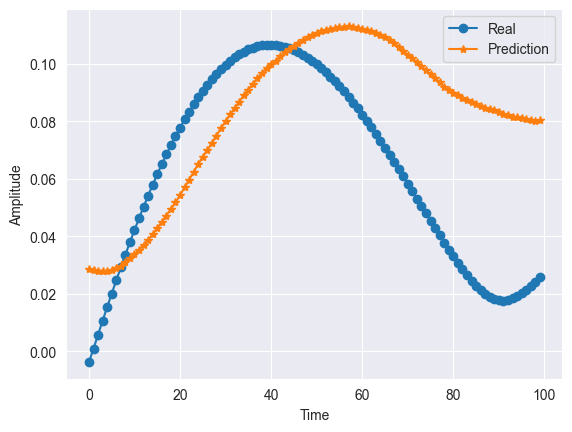

In [12]:
i = -1
plt.plot(y_test[i], 'o-',label='Real')
plt.plot(test100[i], '*-',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## **500 steps**

In [13]:
steps = 500
x_test, y_test = ut2.defectos_set(defectos, amplitude, steps*2, horizon = 2000)

x_test = [utils.subsample(elem,2) for elem in x_test]
x_test = np.array(x_test)

y_test = [utils.subsample(elem,2) for elem in y_test]
y_test = np.array(y_test)


x_test = torch.from_numpy(x_test.astype(np.float32)).squeeze()
y_test = torch.from_numpy(y_test.astype(np.float32)).squeeze()

x_test.shape, y_test.shape

(torch.Size([95, 1000]), torch.Size([95, 500]))

In [14]:
test500 = ut2.rollingWindowPrediction(model,x_test,steps)
np.savetxt("test500_MLP_defectos.csv", test500, delimiter=",")

100%|██████████| 95/95 [00:23<00:00,  3.98it/s]


In [15]:
mse, mape, r2, rmse = er.calculate_errors(test500, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.008413920664736093
Mean Absolute Percentage Error: 1.1173580182944356
R2 Score: -2.2744946297281285
Root Mean Squared Error: 0.08956432432603166


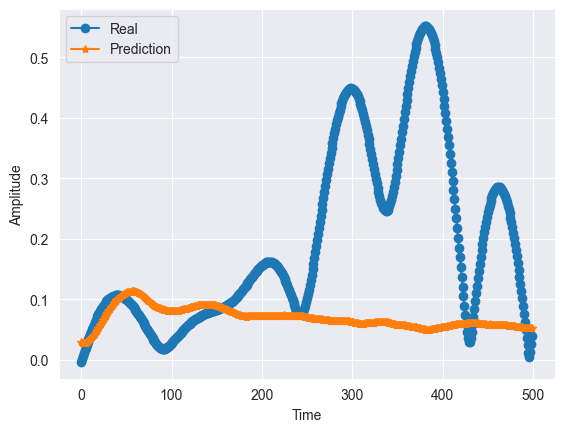

In [16]:
i = -1
plt.plot(y_test[i], 'o-',label='Real')
plt.plot(test500[i], '*-',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## **1000 steps**

In [17]:
steps = 1000
x_test, y_test = ut2.defectos_set(defectos, amplitude, steps*2, horizon = 2000)

x_test = [utils.subsample(elem,2) for elem in x_test]
x_test = np.array(x_test)

y_test = [utils.subsample(elem,2) for elem in y_test]
y_test = np.array(y_test)


x_test = torch.from_numpy(x_test.astype(np.float32)).squeeze()
y_test = torch.from_numpy(y_test.astype(np.float32)).squeeze()

x_test.shape, y_test.shape

(torch.Size([95, 1000]), torch.Size([95, 1000]))

In [18]:
test1000 = ut2.rollingWindowPrediction(model,x_test,steps)
np.savetxt("test1000_MLP_defectos.csv", test1000, delimiter=",")

100%|██████████| 95/95 [00:46<00:00,  2.03it/s]


In [19]:
mse, mape, r2, rmse = er.calculate_errors(test1000, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.01159559785738839
Mean Absolute Percentage Error: 0.9745060236629252
R2 Score: -1.4902691491796587
Root Mean Squared Error: 0.10503626072392927


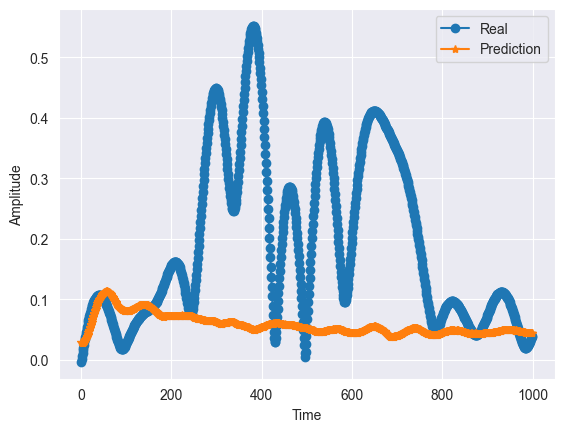

In [20]:
i = -1
plt.plot(y_test[i], 'o-',label='Real')
plt.plot(test1000[i], '*-',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()